## Final Project (Midterm)

## Name: Kathryn Lee

## Link to your github repo: https://github.com/nowyouleeme/data1030-final-project

Make sure you are in the DATA1030 environment:

In [152]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Intro slide
The intro slide should explain:

**Q1** What is the problem you want to solve? Based on this problem, are you dealing with iid or non-iid data? 

The primary problem I aim to solve is predicting complications following a myocardial infarction (MI), or heart attack, using patient data 24 hours after admission to the hospital. Based on this problem, I am dealing with iid data. Since there is no group or time-series aspect to the data by nature of focusing on one specific time point that the data was taken at. 

**Q2** Why is this important?

Myocardial infarction (MI) presents one of the most complex challenges in modern medicine due to the significant variability in its manifestations among patients. Each year, over a million people in the United States are affected by MI, with 200,000 to 300,000 dying before even reaching the hospital. Alarmingly, someone experiences an MI every 29 seconds, and one patient dies every minute [1].\
MI can occur with or without complications, and these complications can significantly impact long-term prognosis. While some have minimal effects, others can exacerbate the condition and even lead to death. This variability complicates the ability of experienced specialists to predict complications reliably and promptly.\
Therefore, accurately predicting MI complications is essential for enabling early intervention and implementing effective preventive measures.

**Q3** Is this a regression or classification problem?

This is a classification problem, as we are predicting categorical outcomes (complications). The complications, listed in columns 113-124, represent specific, discrete outcomes—whether or not a particular complication is present. This aligns with the nature of classification problems, where the objective is to assign categories or labels to the input data.

**Q4** Where did you get the data from?

I obtained this dataset from the UC Irvine Machine Learning Respository in the "Health and Medicine" subject area.

**Q5** How was data the collected?

The dataset was collected at the Krasnoyarsk Interdistrict Clinical Hospital between 1992 and 1995. It includes data from 1700 separate patients who were admitted for MI, with detailed medical records and information about complications following the event.

### Read in the data

The dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 

In [153]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Myocardial infarction complications Database.csv')
display(df)

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1  77.0    1       2.0        1.0        1.0       2.0       NaN   
1        2  55.0    1       1.0        0.0        0.0       0.0       0.0   
2        3  52.0    1       0.0        0.0        0.0       2.0       NaN   
3        4  68.0    0       0.0        0.0        0.0       2.0       NaN   
4        5  60.0    1       0.0        0.0        0.0       2.0       NaN   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0     3.0         0.0  ...          0           0         0          0   
1     0.0         0.0  ...          0           0         0          0   
2     2.0         0.0  ...          0           0         0          0   
3     2.0         0.0  ...          0           0         0          0   
4     3.0         0.0  ...          0           0         0          0   
...   ...         ...  ...        ...         ...       ...        ...   
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 124 columns]

**Input Data:** Columns 2-112 represent patient information (medical history, test results, etc.) used for prediction. Different columns may be excluded at different time stages. \
**Output Data:** Columns 113-124 represent possible complications, which serve as the target variables for prediction.

### EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First, you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe (how many datapoints and features are there)?

In [154]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1700
Number of columns:  124


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [155]:
pd.set_option('display.max_rows', 124) # prevent truncation
print('Data types of features:')
print(df.dtypes)

Data types of features:
ID                 int64
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K

**Q3** Are there any imbalanced classes or missing values? Describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).

All classes are imbalanced: 
FIBR_PREDS
0    1530
1     170
Name: count, dtype: int64


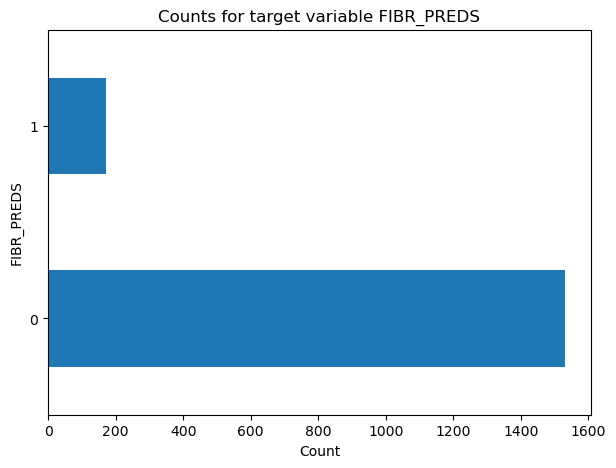

PREDS_TAH
0    1680
1      20
Name: count, dtype: int64


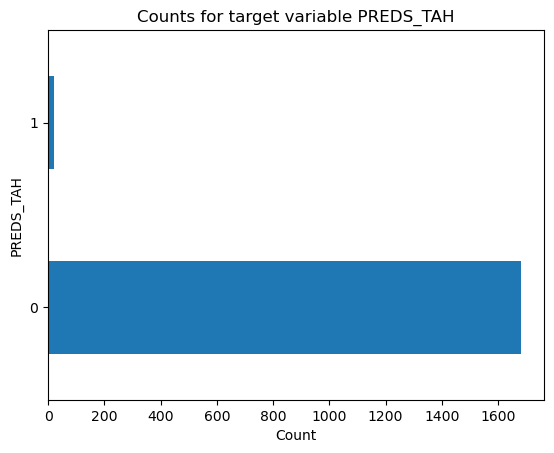

JELUD_TAH
0    1658
1      42
Name: count, dtype: int64


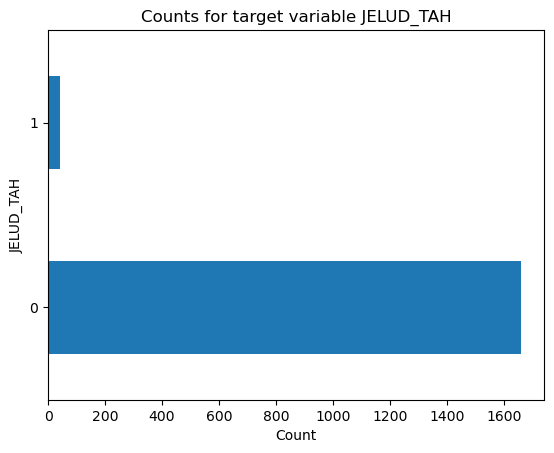

FIBR_JELUD
0    1629
1      71
Name: count, dtype: int64


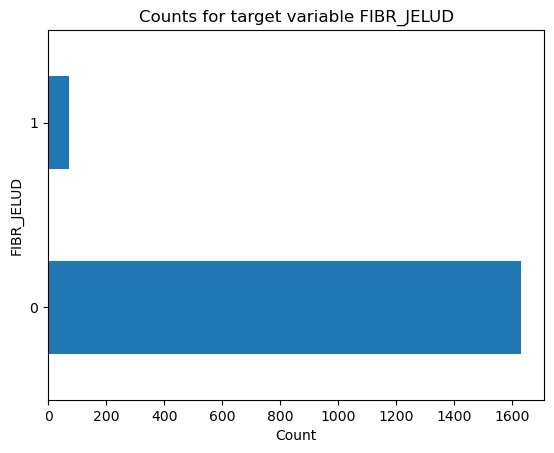

A_V_BLOK
0    1643
1      57
Name: count, dtype: int64


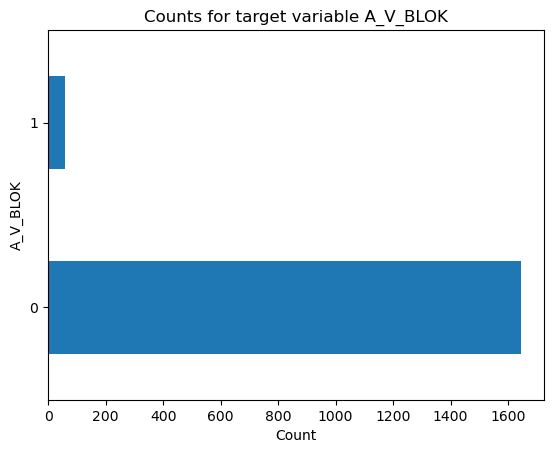

OTEK_LANC
0    1541
1     159
Name: count, dtype: int64


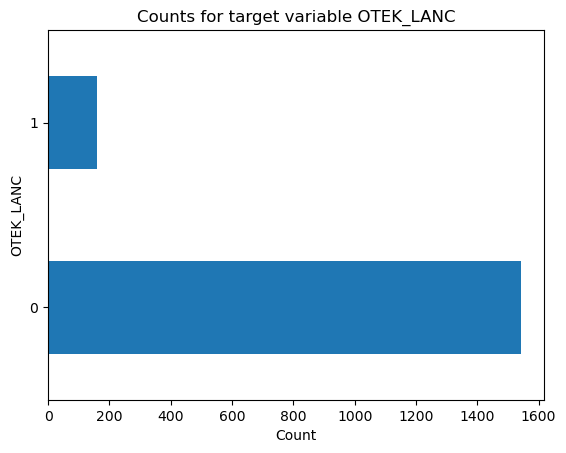

RAZRIV
0    1646
1      54
Name: count, dtype: int64


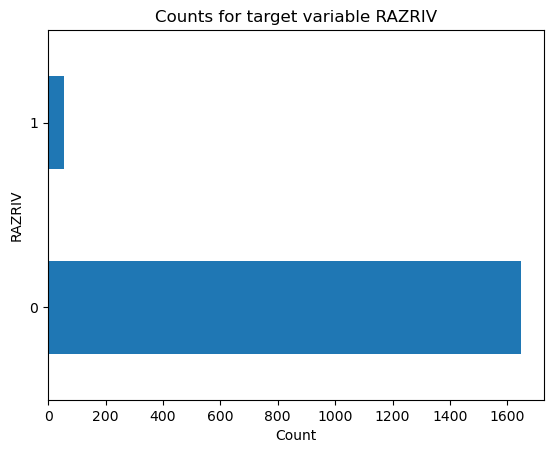

DRESSLER
0    1625
1      75
Name: count, dtype: int64


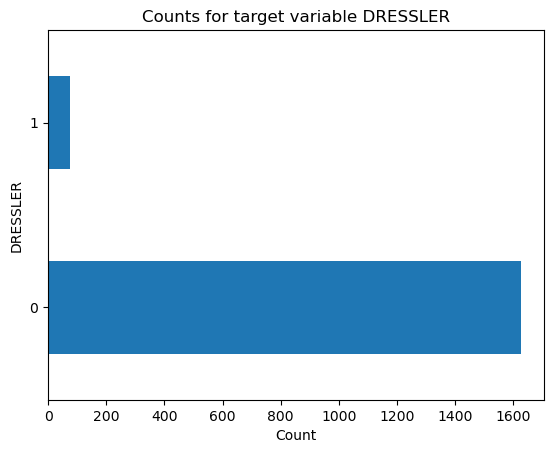

ZSN
0    1306
1     394
Name: count, dtype: int64


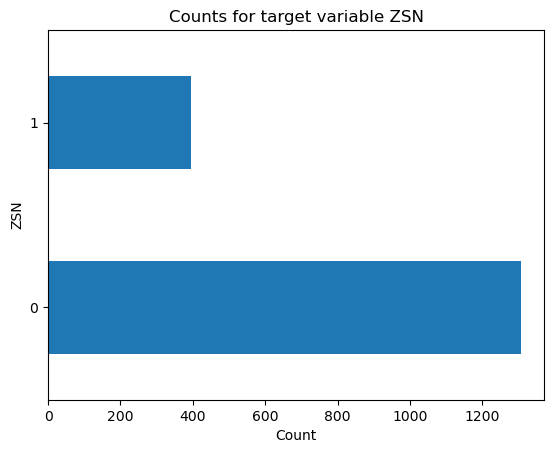

REC_IM
0    1541
1     159
Name: count, dtype: int64


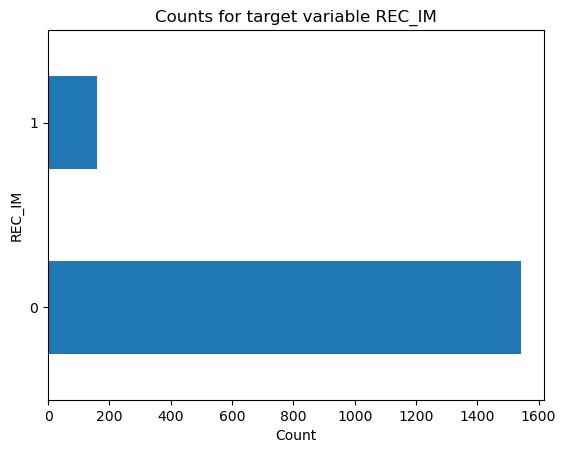

P_IM_STEN
0    1552
1     148
Name: count, dtype: int64


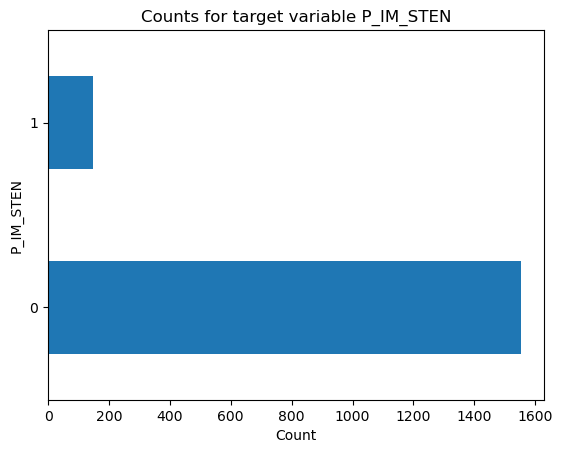

LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64


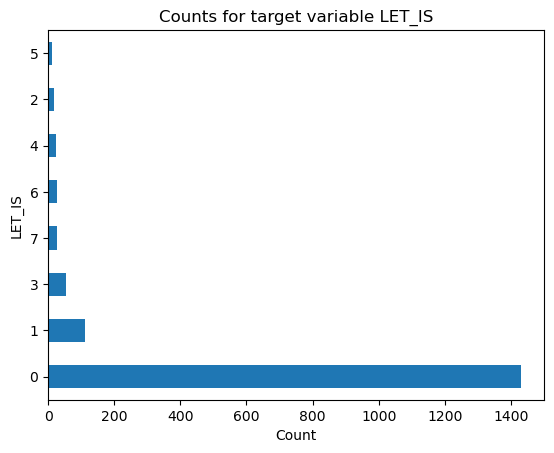

Missing values percentage per column:
ID                0.000000
REC_IM            0.000000
ZSN               0.000000
DRESSLER          0.000000
RAZRIV            0.000000
OTEK_LANC         0.000000
A_V_BLOK          0.000000
FIBR_JELUD        0.000000
JELUD_TAH         0.000000
PREDS_TAH         0.000000
FIBR_PREDS        0.000000
P_IM_STEN         0.000000
LET_IS            0.000000
SEX               0.000000
IM_PG_P           0.058824
INF_ANAM          0.235294
NA_R_1_n          0.294118
zab_leg_06        0.411765
zab_leg_04        0.411765
zab_leg_03        0.411765
zab_leg_02        0.411765
zab_leg_01        0.411765
SIM_GIPERT        0.470588
AGE               0.470588
GB                0.529412
NITR_S            0.529412
LID_S_n           0.588235
NOT_NA_1_n        0.588235
fibr_ter_02       0.588235
fibr_ter_01       0.588235
endocr_02         0.588235
fibr_ter_03       0.588235
fibr_ter_05       0.588235
fibr_ter_06       0.588235
fibr_ter_07       0.588235
fibr_ter_08      

In [156]:
# classes = the distinct categories or labels that a model predicts in classification problems
# Utilize provided "Myocardial infarction complications Database description" pdf to determine where to look
from matplotlib import pylab as plt

plt.figure(figsize=(7,5))
classes = df.iloc[:, 112:124].columns.tolist() # all of the target variables, which are all categorical

print("All classes are imbalanced: ")
for class_ in classes:
    print(df[class_].value_counts())  # Check class distribution
    df[class_].value_counts().plot.barh()
    plt.title(f'Counts for target variable {class_}')
    plt.ylabel(f'{class_}')
    plt.xlabel('Count')
    plt.show()

# missing values
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print("Missing values percentage per column:")
print(missing_percentage_sorted)
frac_missing = (df.isna().sum(axis=1) != 0).sum() / df.shape[0]
print("Percentage of points with at least one missing value:", 100*round(frac_missing, 4), "%")

**Q3** The ML target variable in this dataset is the lethal outcomes. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.

In [157]:
# .describe = insightful when data is continuous
print(df["LET_IS"].describe())

# .value_counts = insightful when data is categorical
print(df["LET_IS"].value_counts())

count    1700.000000
mean        0.477059
std         1.381818
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: LET_IS, dtype: float64
LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64


This dataset includes multiple possible target variables (as stated by the authors themselves), ranging from atrial fibrillation and pulmonary edema to relapse of the myocardial infarction and the lethal outcome. While handling multiple target variables at once would be the most holistic approach, due to the limitations of supervised learning, I am going to focus on the target variable "lethal outcome (cause)," or "LET_IS" for its greater robustness relative to the other target variables. "LET_IS" is categorical, according to the dataset's description PDF provided, in which each data point is labeled with an integer ranging from 0-7 with an associated outcome: unknown (0), cardiogenic shock (1), pulmonary edema (2), myocardial rupture (3), progress of congestive heart failure (4), thromboembolism (5), asystole (6), and ventricular fibrillation (7). The other target variables are also categorical but are all in the format of yes/no for a given condition, which is quite limiting. \
We can also check that this by using the .describe() and .value_counts() function, in which .value_counts() (which is best for represting categoriccal data) was the only function that gave us useful information in understanding the lethal outcome data (how many of each lethal outcome was recorded for the data points). On the other hand, the .describe() (which is best for continuous data) function did not give us any useful additional information about the data, in which the statistical calculations (mean, standard deviation, max, etc.) doesn't make it any easier to work with or represent the discrete categories of the "LET_IS" target variable. 

**Q5** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

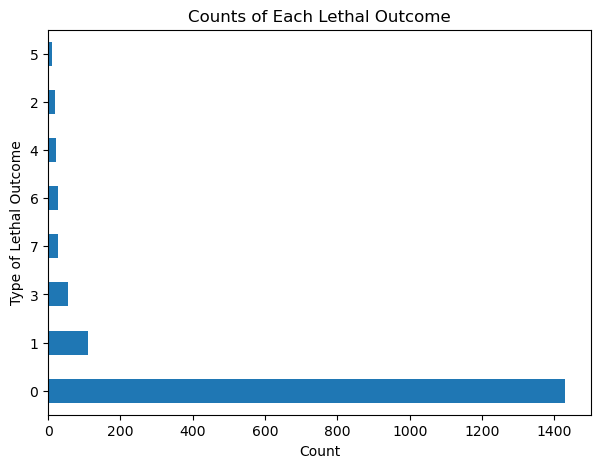

In [158]:
plt.figure(figsize = (7,5))
df["LET_IS"].value_counts().plot.barh()
plt.title('Counts of Each Lethal Outcome')
plt.ylabel('Type of Lethal Outcome')
plt.xlabel('Count')
plt.show()

**Q6** Create as many figures you can to better understand your dataset and calculate summary statistics as well. Then, select three figures that you want to show during the presentation. \
Explain why you chose the figures! Why are they interesting, unexpected, important?

In [159]:
df.drop(columns=['R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], inplace=True)

Missing values percentage per column:
ID               0.0
NA_BLOOD         0.0
GIPER_NA         0.0
K_BLOOD          0.0
GIPO_K           0.0
fibr_ter_08      0.0
fibr_ter_07      0.0
fibr_ter_06      0.0
fibr_ter_05      0.0
fibr_ter_03      0.0
fibr_ter_02      0.0
fibr_ter_01      0.0
n_p_ecg_p_12     0.0
n_p_ecg_p_11     0.0
n_p_ecg_p_10     0.0
n_p_ecg_p_09     0.0
n_p_ecg_p_08     0.0
n_p_ecg_p_07     0.0
n_p_ecg_p_06     0.0
n_p_ecg_p_05     0.0
n_p_ecg_p_04     0.0
n_p_ecg_p_03     0.0
n_p_ecg_p_01     0.0
n_r_ecg_p_10     0.0
n_r_ecg_p_09     0.0
n_r_ecg_p_08     0.0
ALT_BLOOD        0.0
AST_BLOOD        0.0
KFK_BLOOD        0.0
L_BLOOD          0.0
REC_IM           0.0
ZSN              0.0
DRESSLER         0.0
RAZRIV           0.0
OTEK_LANC        0.0
A_V_BLOK         0.0
FIBR_JELUD       0.0
JELUD_TAH        0.0
PREDS_TAH        0.0
FIBR_PREDS       0.0
TRENT_S_n        0.0
TIKL_S_n         0.0
n_r_ecg_p_06     0.0
ASP_S_n          0.0
ANT_CA_S_n       0.0
B_BLOK_S_n       

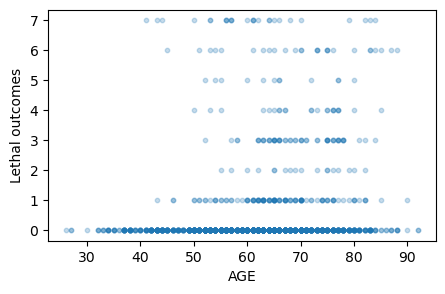

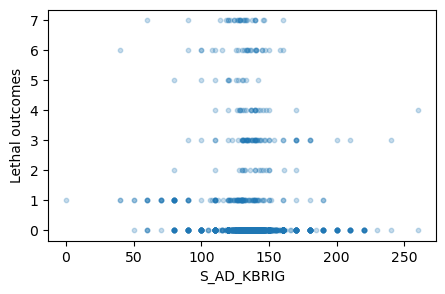

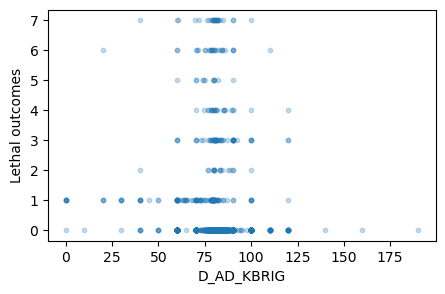

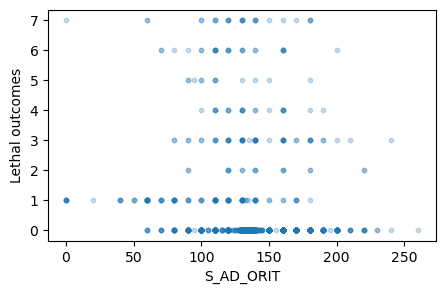

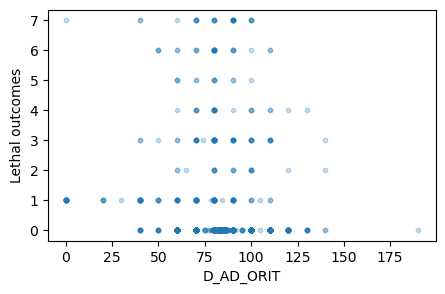

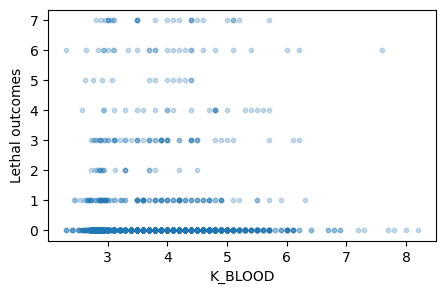

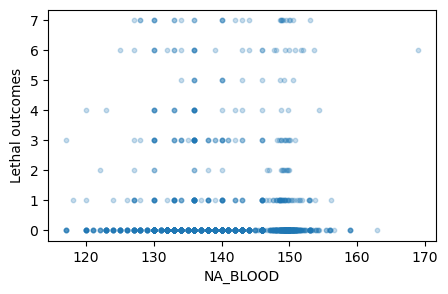

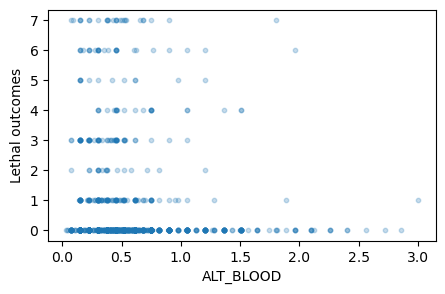

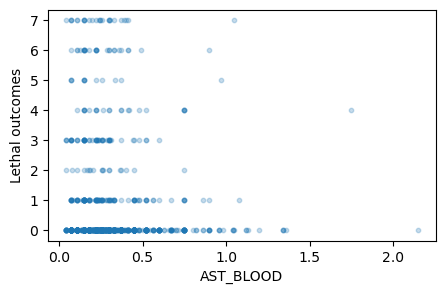

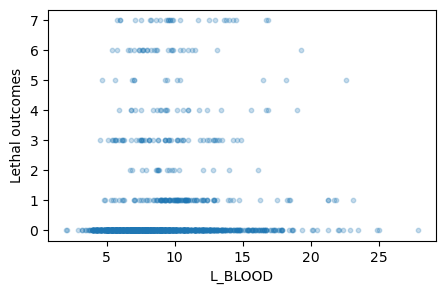

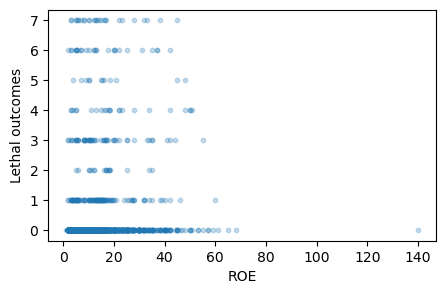

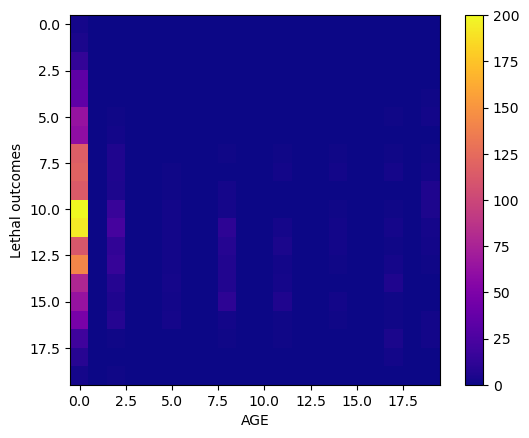

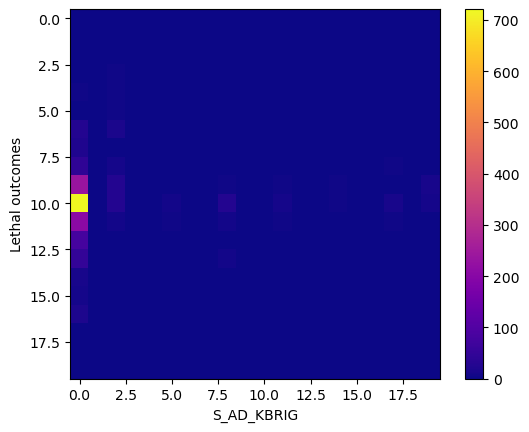

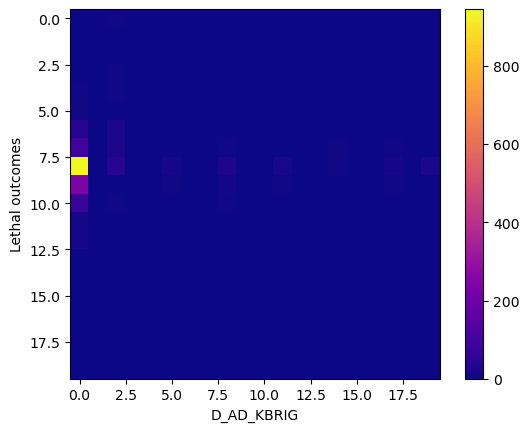

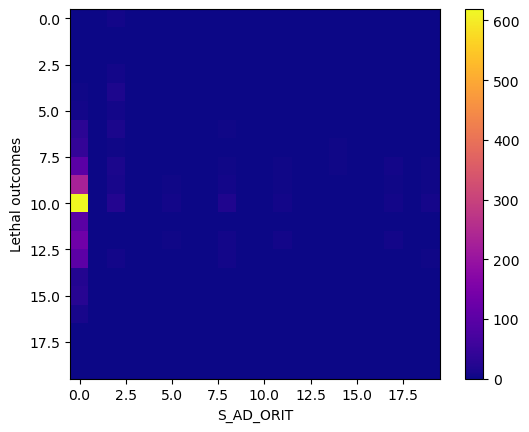

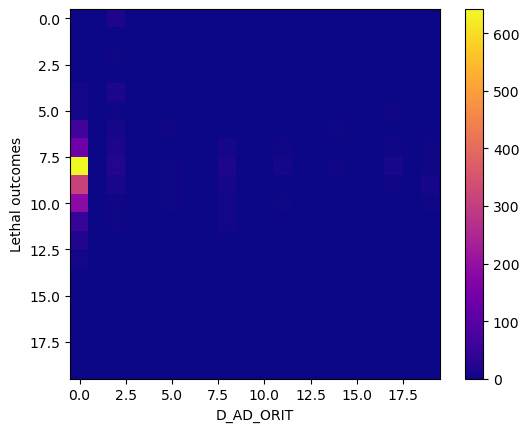

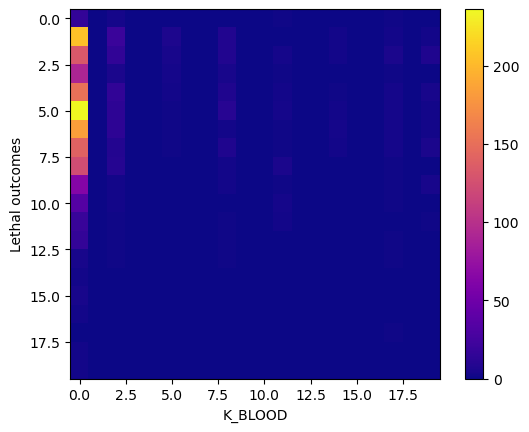

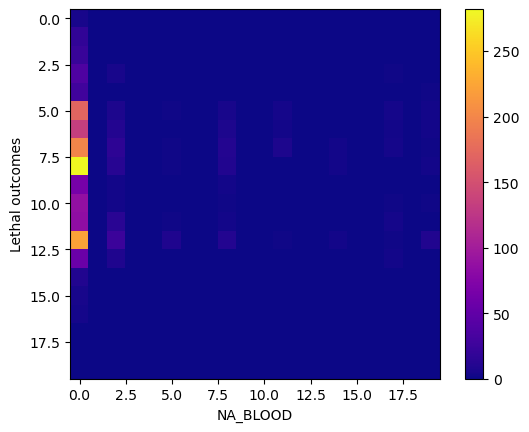

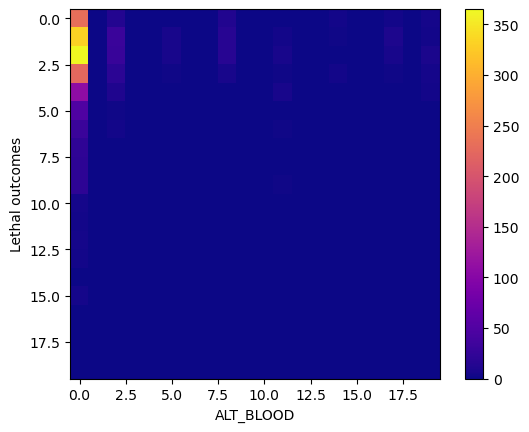

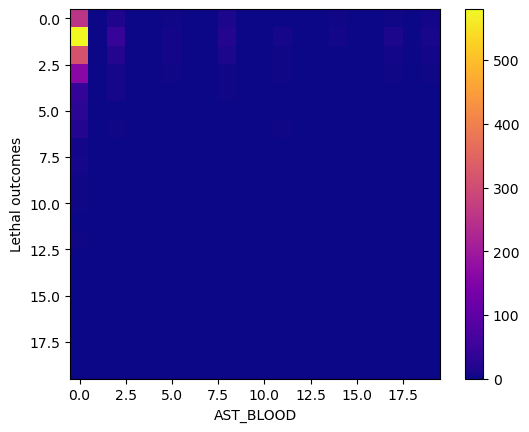

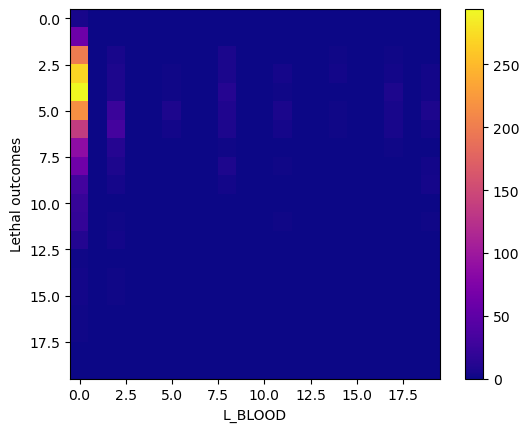

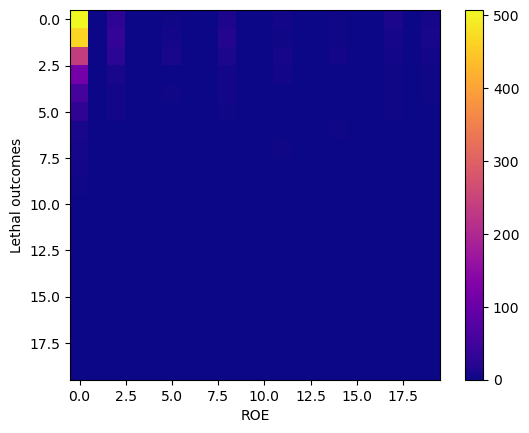

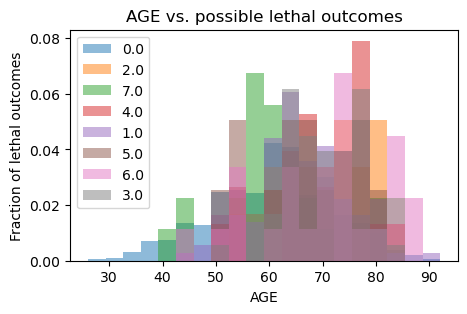

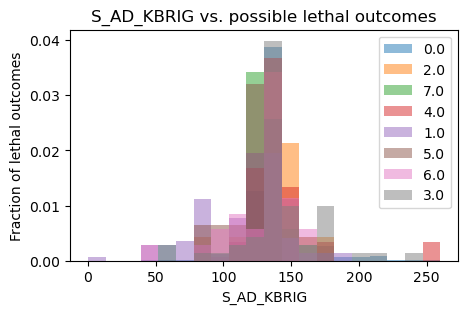

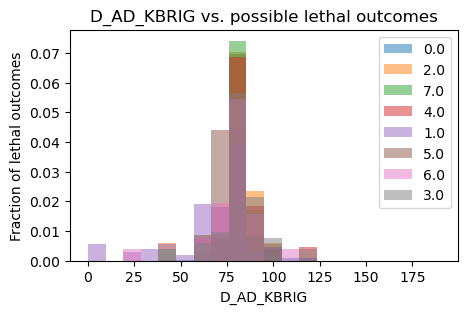

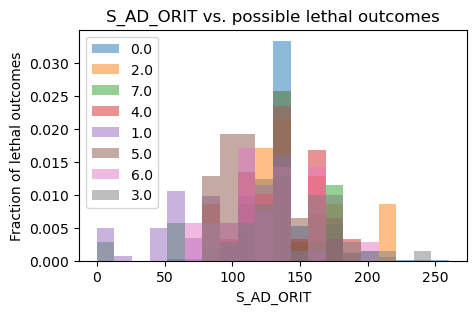

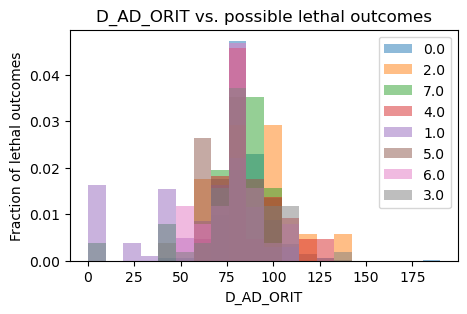

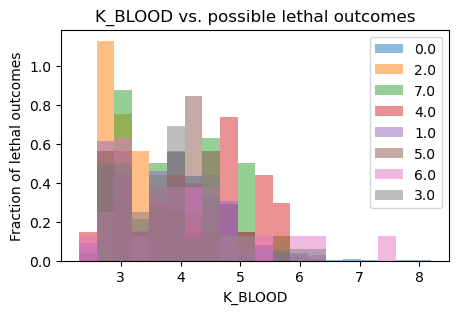

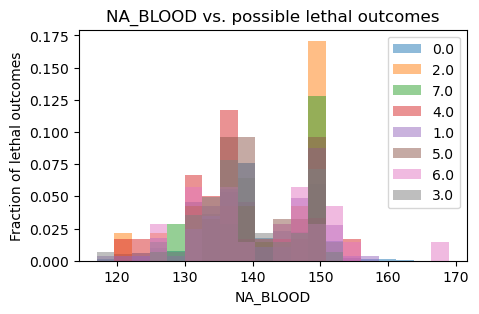

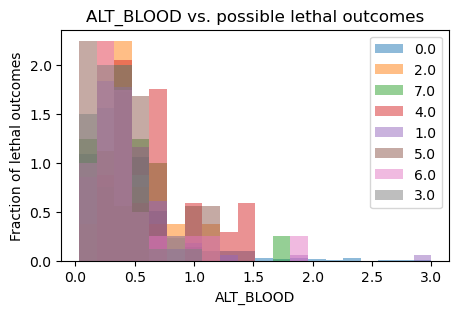

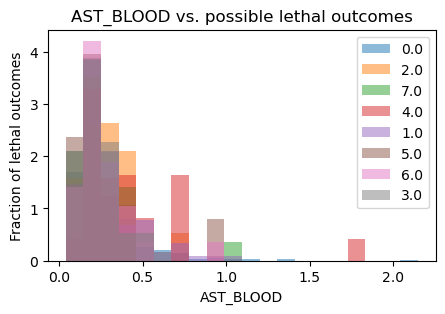

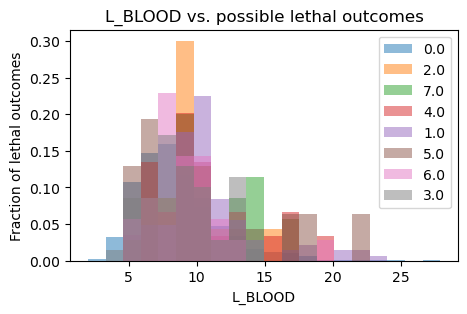

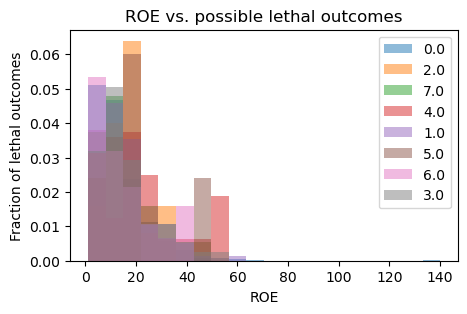

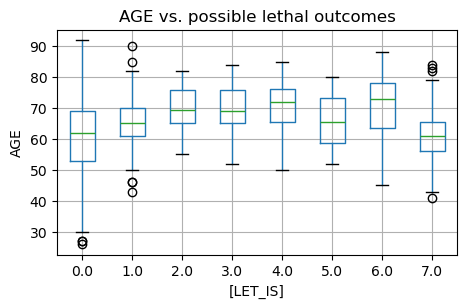

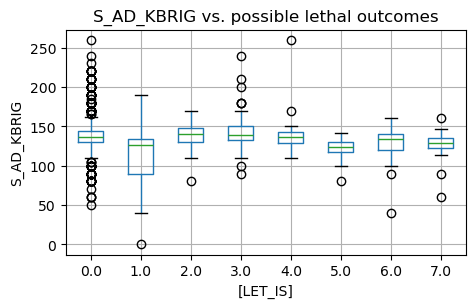

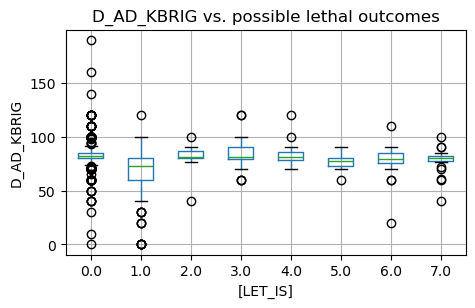

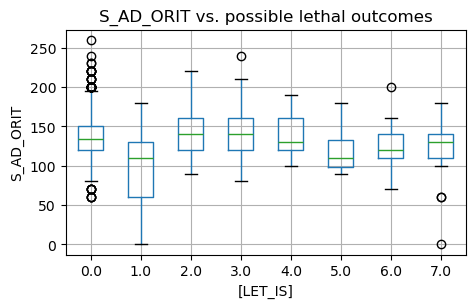

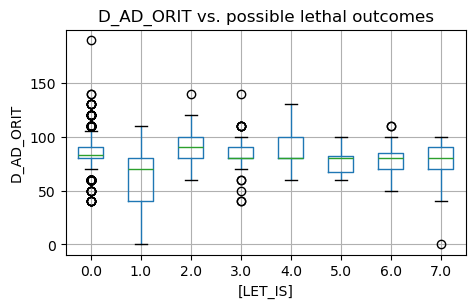

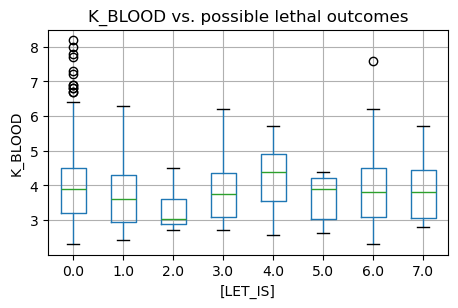

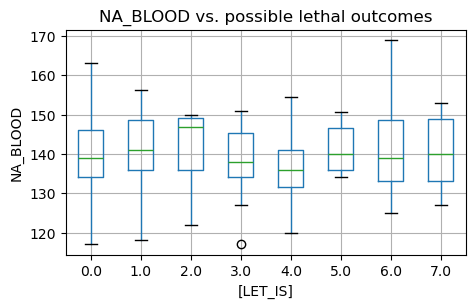

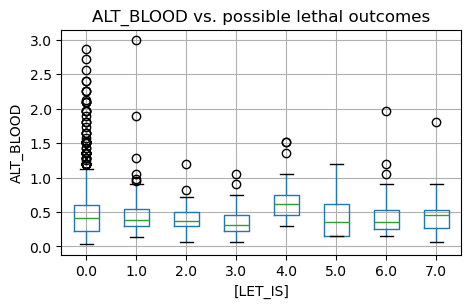

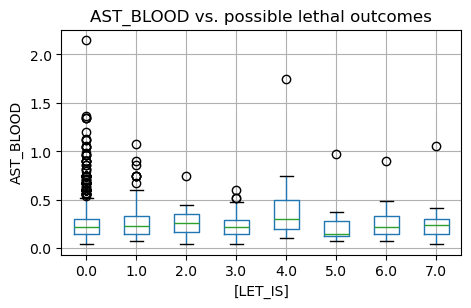

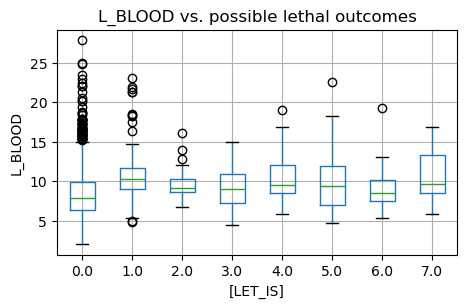

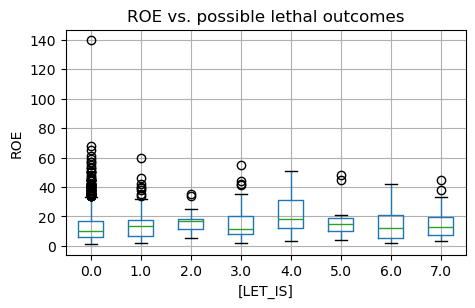

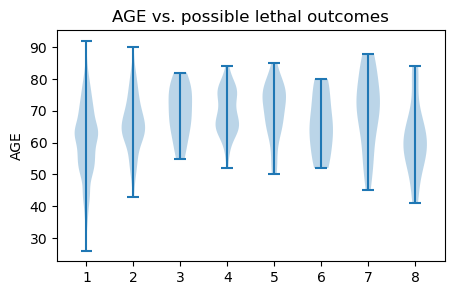

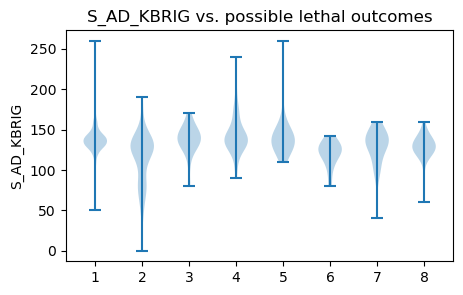

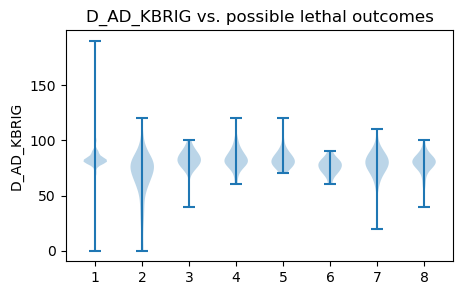

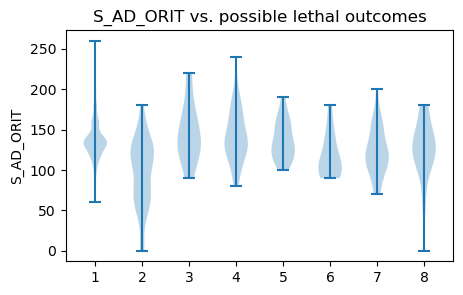

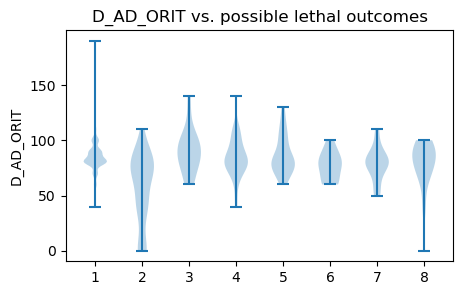

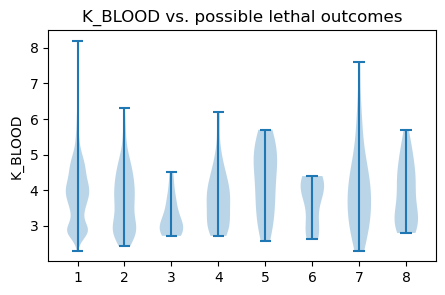

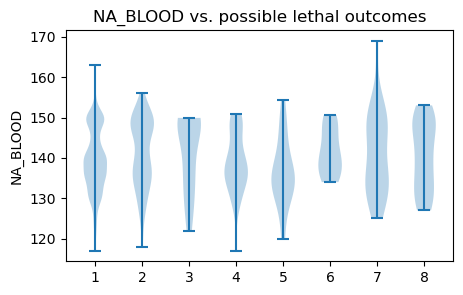

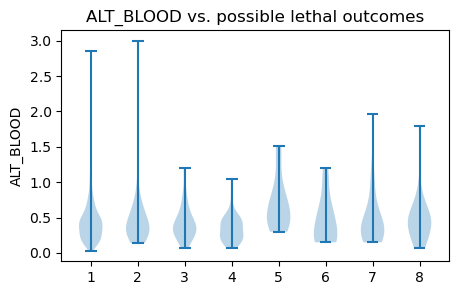

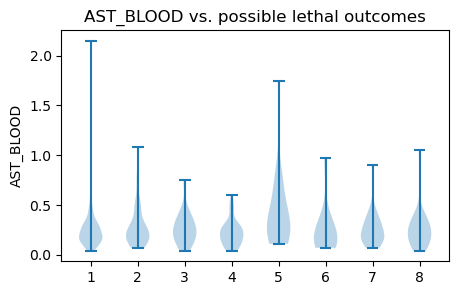

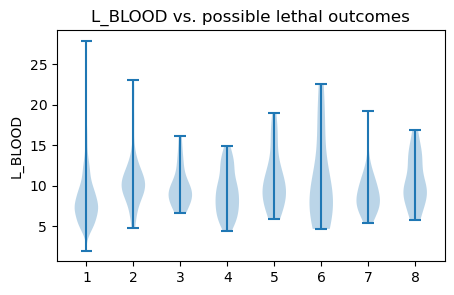

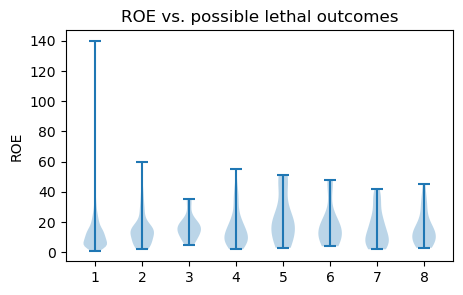

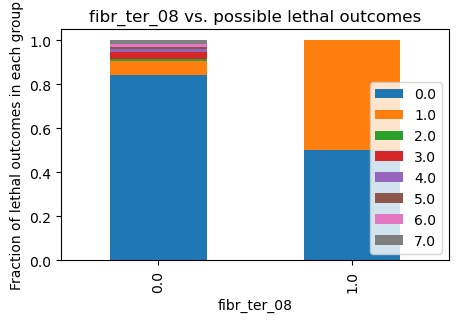

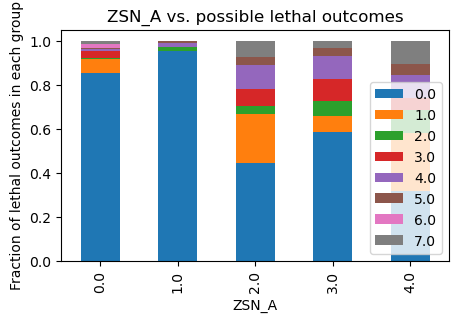

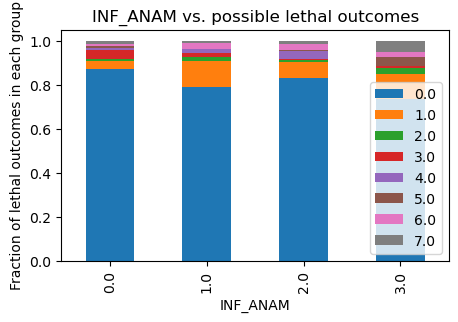

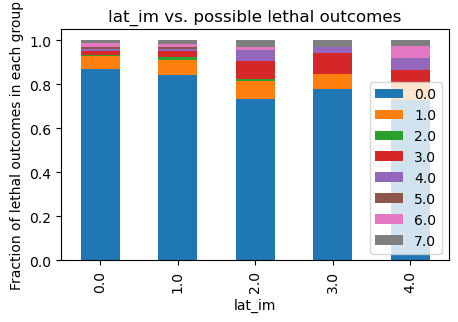

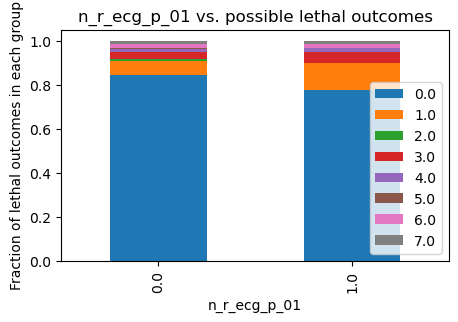

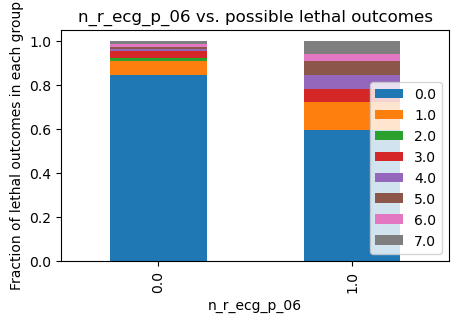

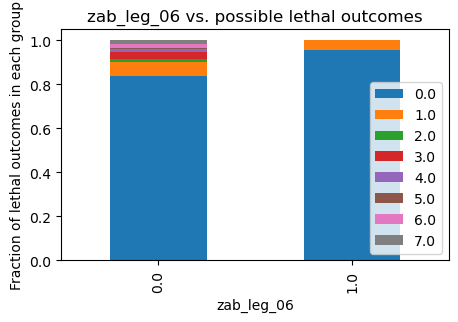

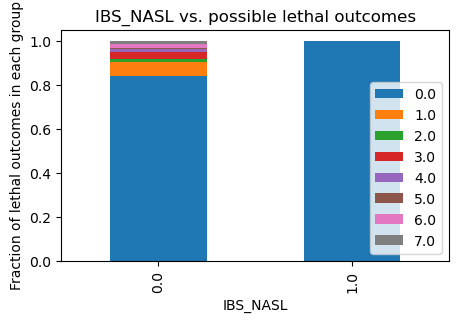

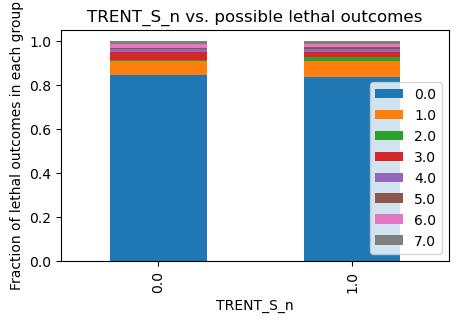

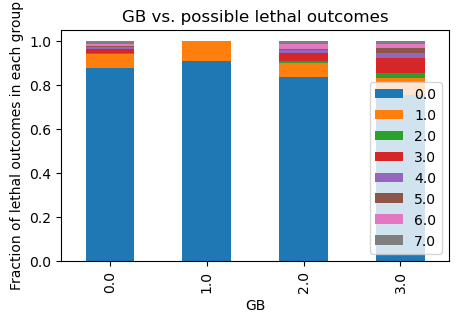

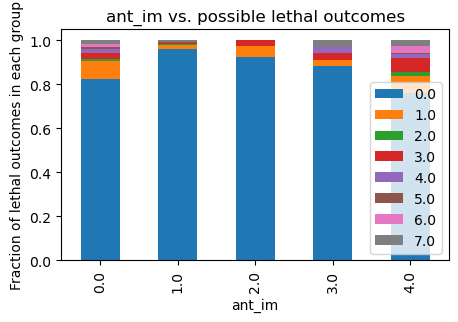

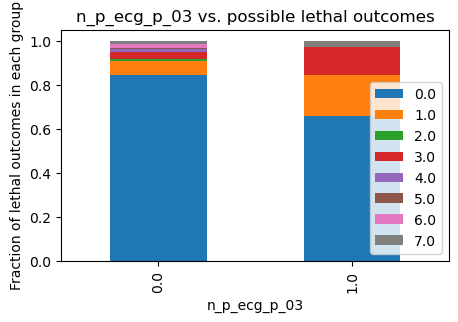

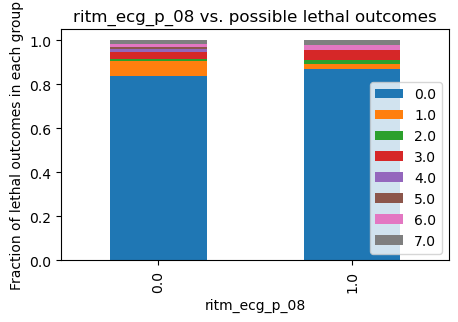

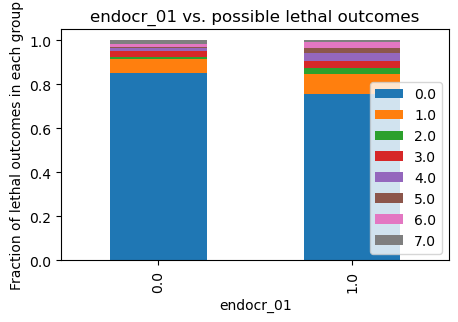

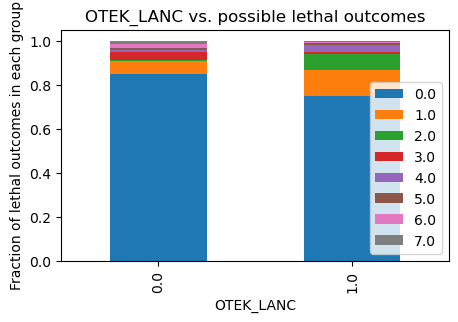

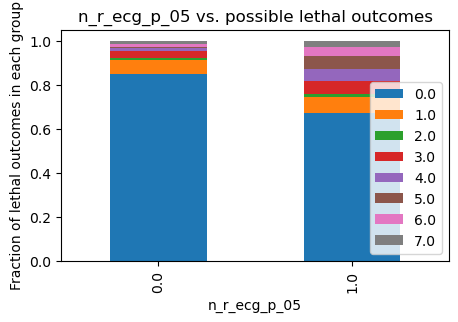

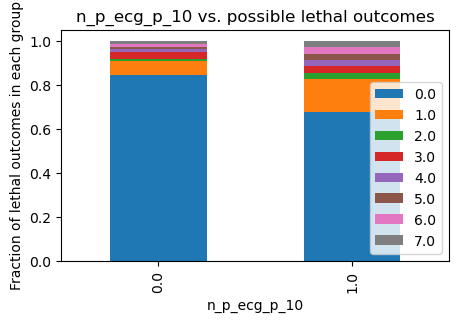

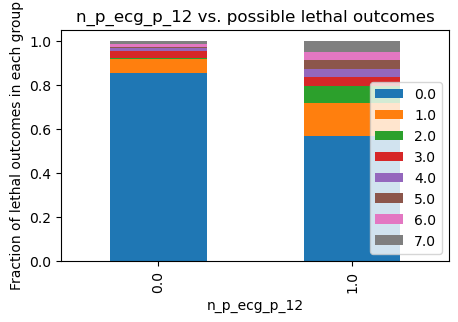

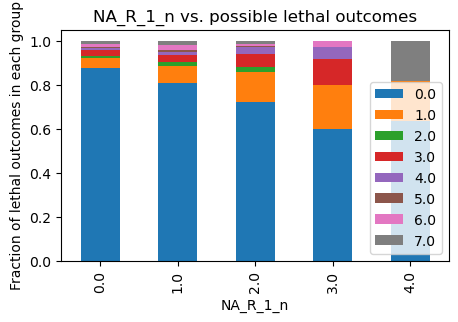

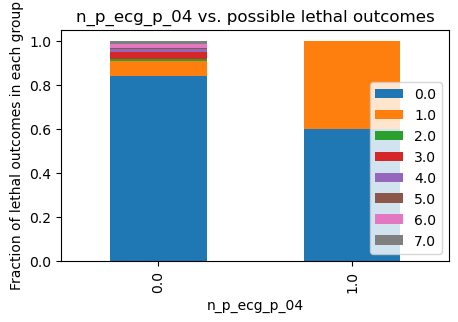

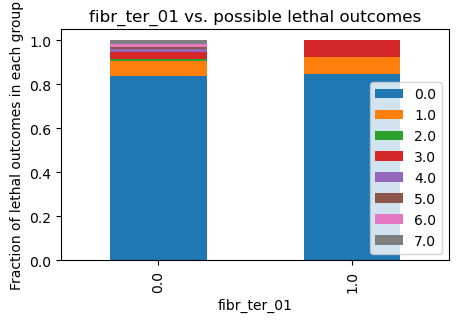

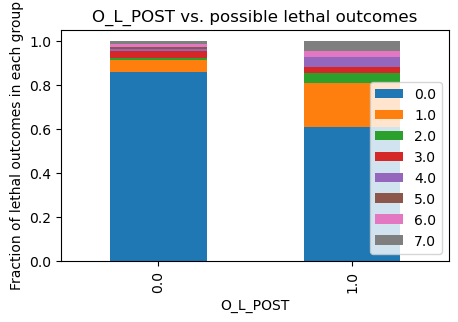

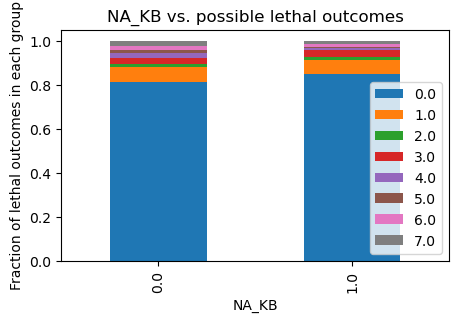

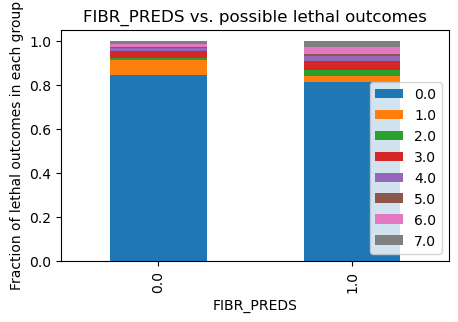

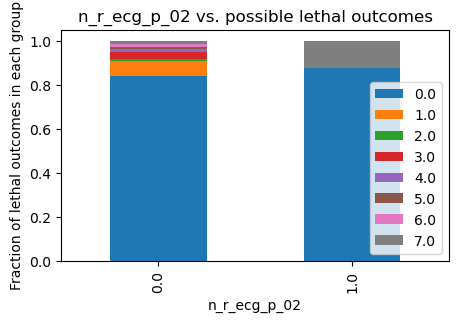

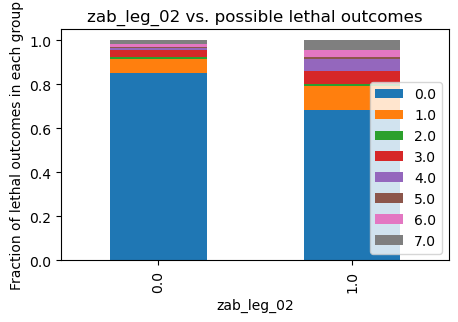

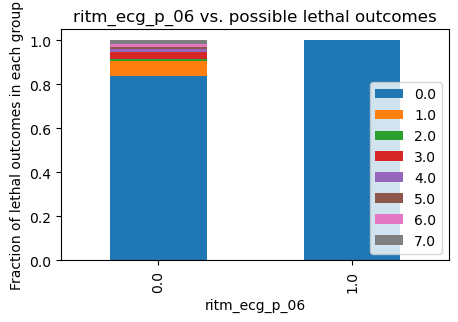

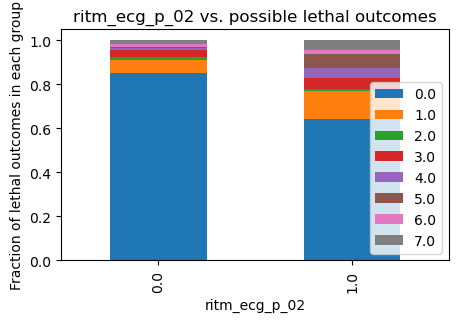

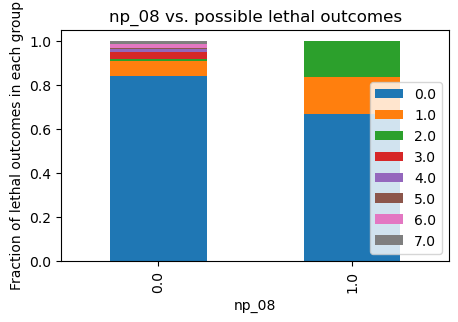

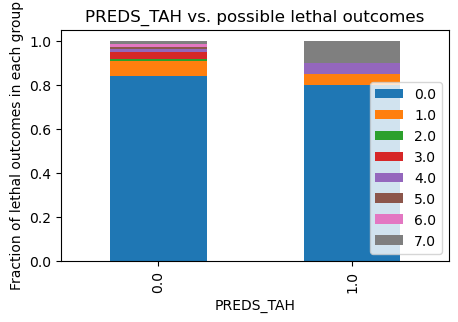

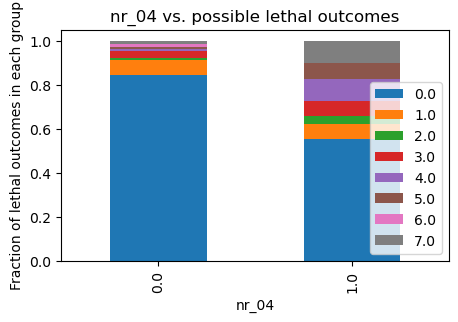

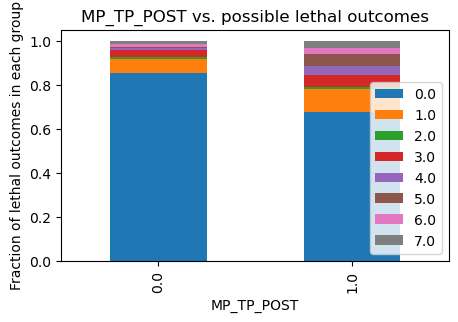

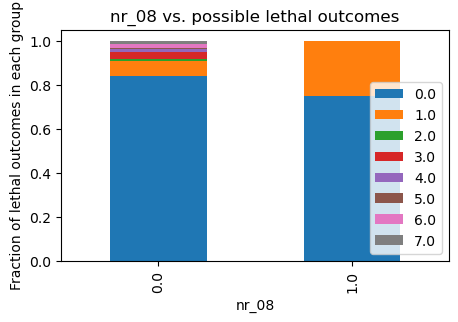

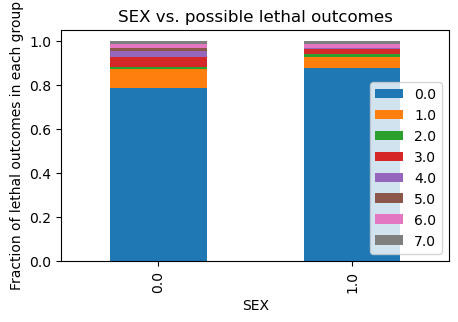

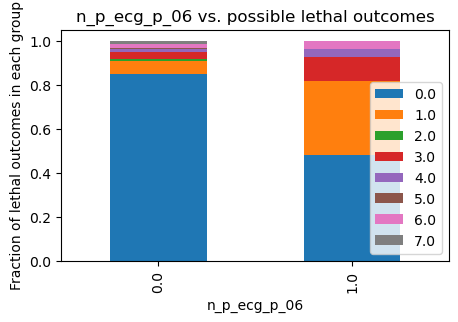

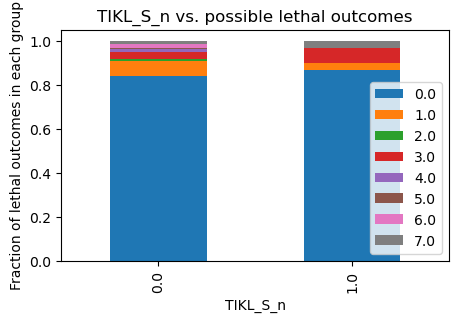

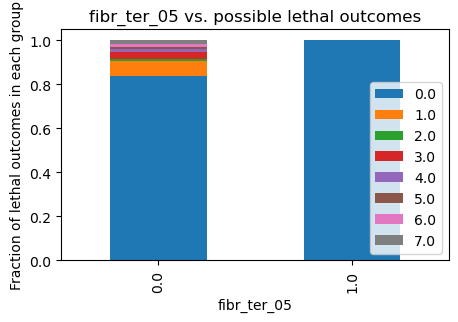

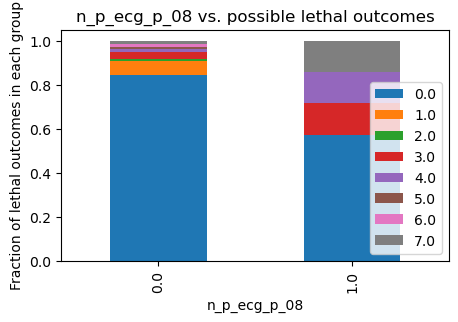

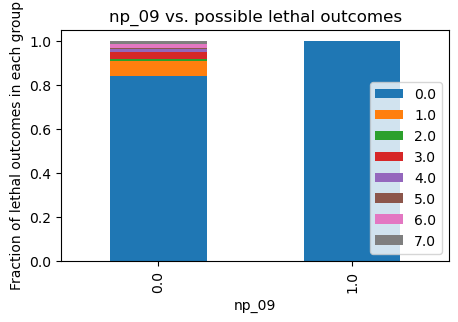

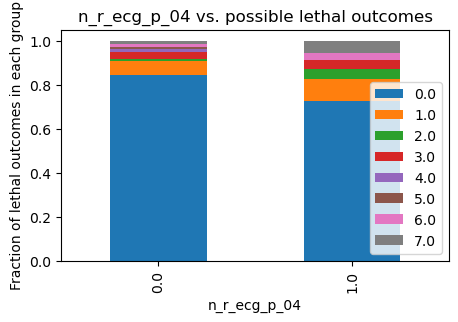

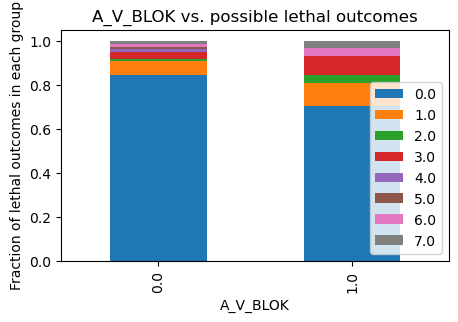

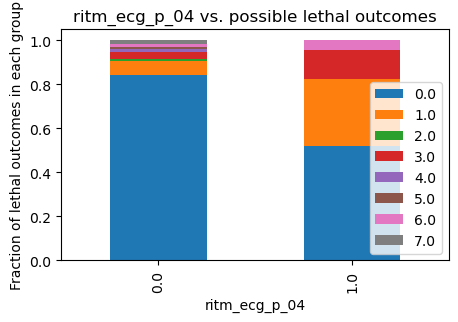

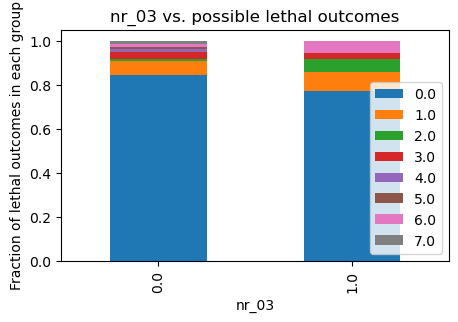

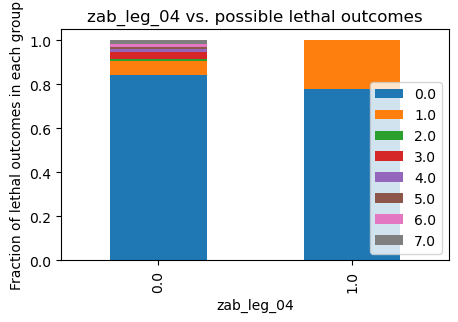

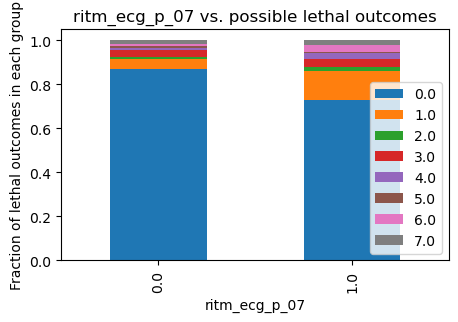

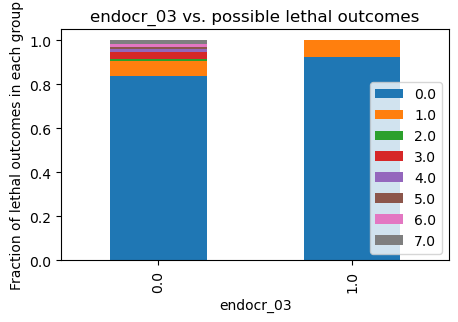

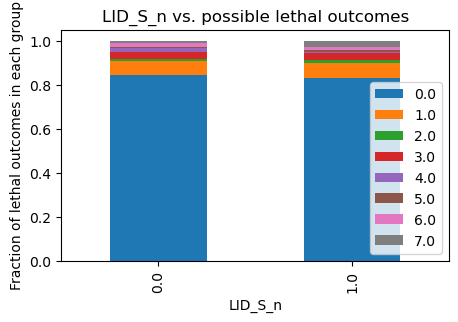

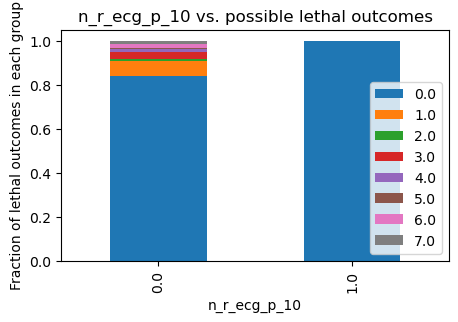

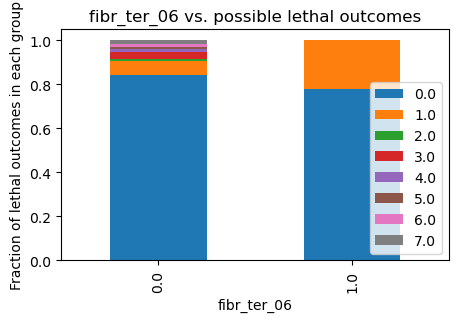

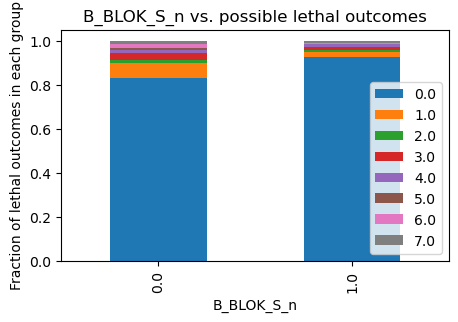

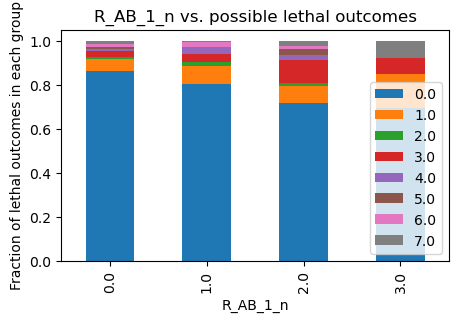

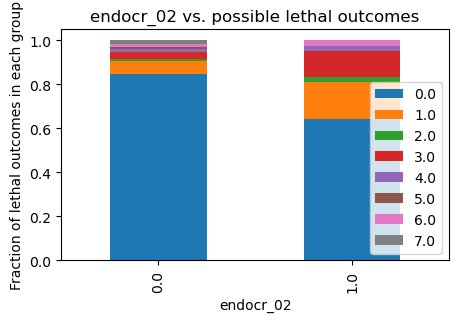

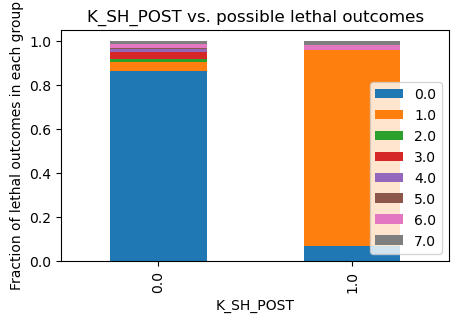

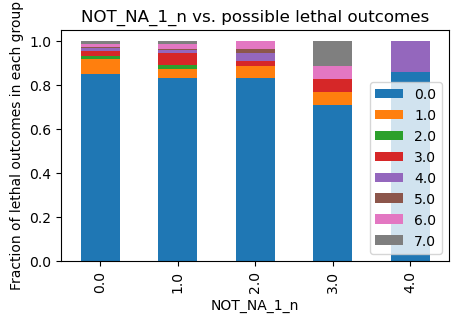

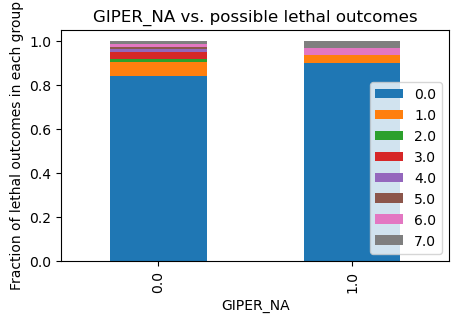

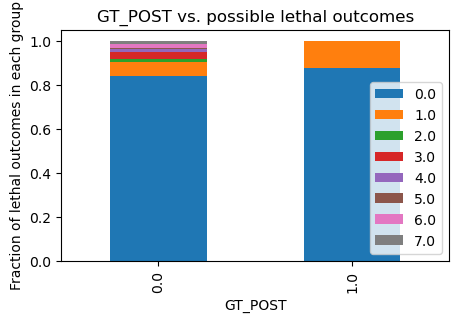

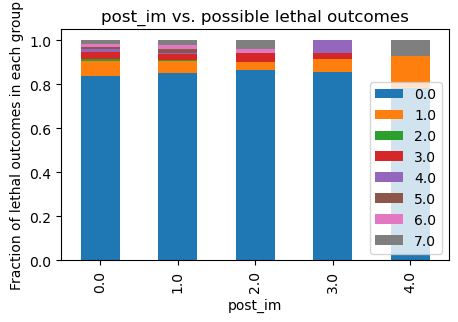

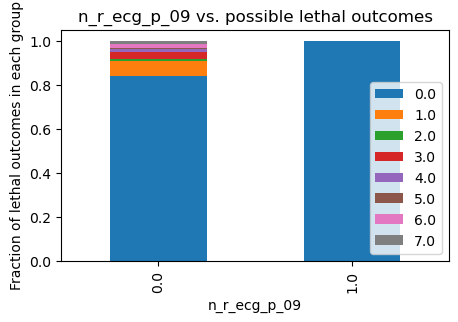

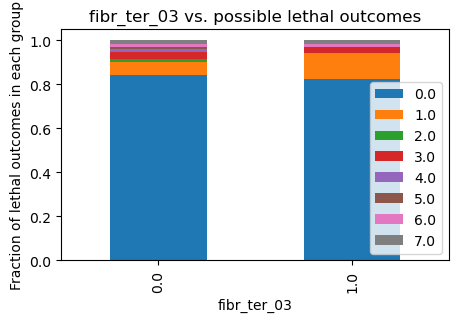

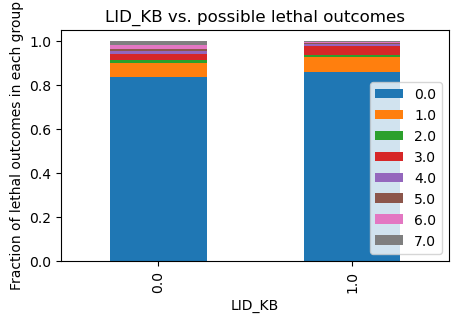

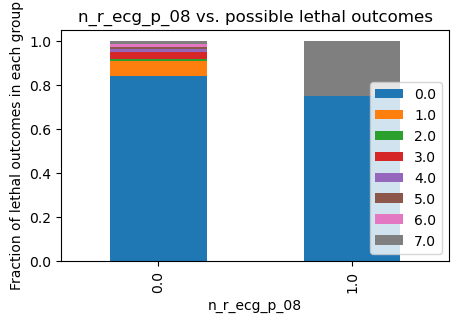

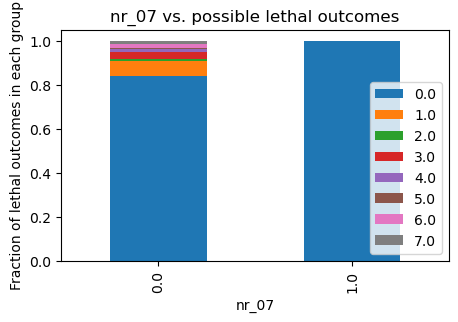

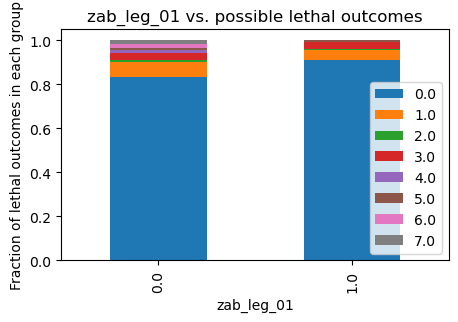

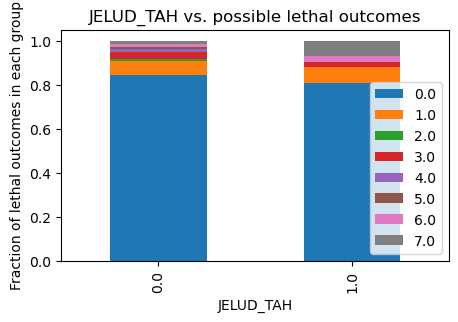

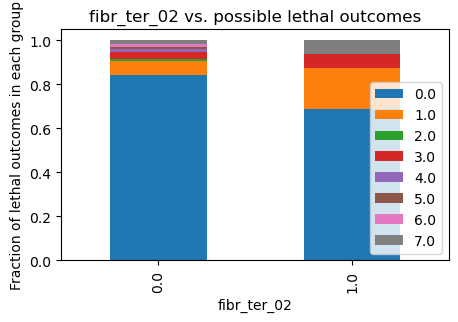

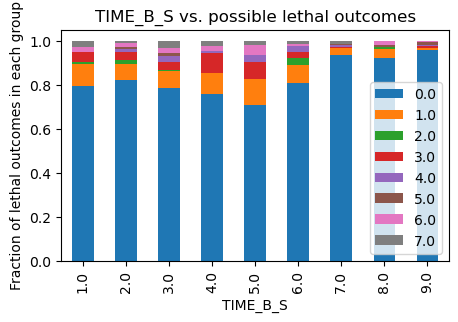

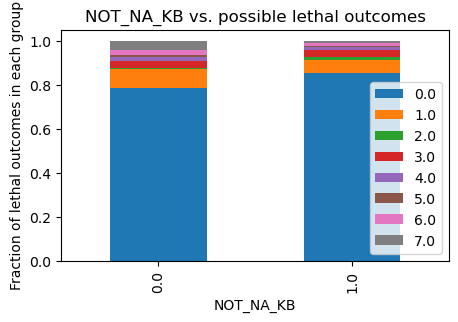

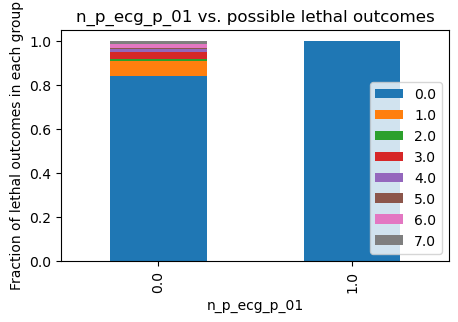

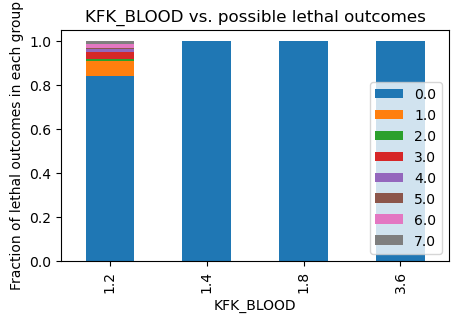

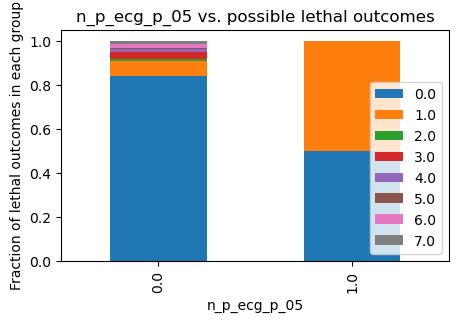

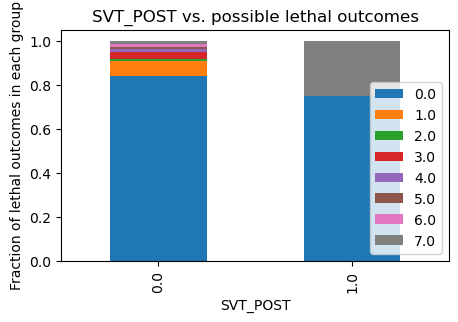

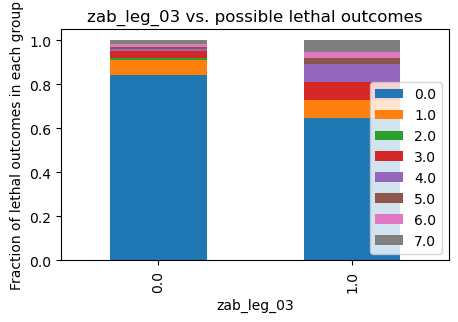

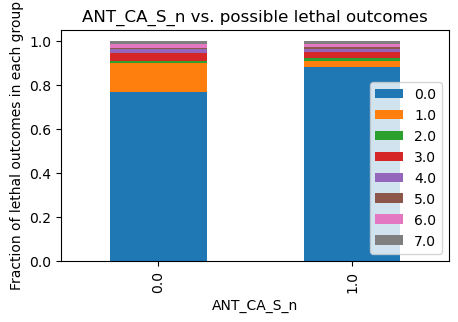

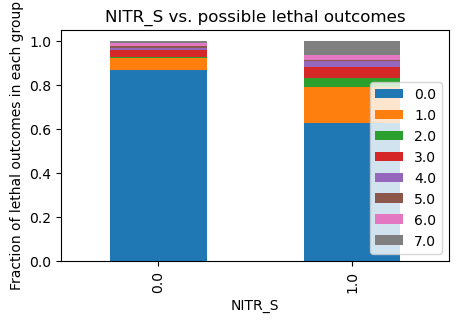

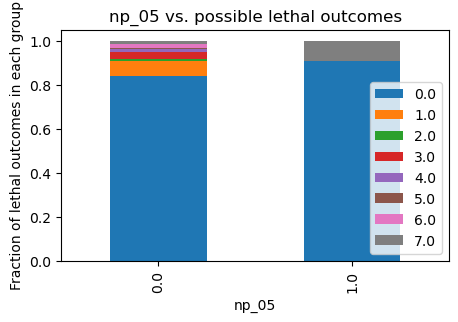

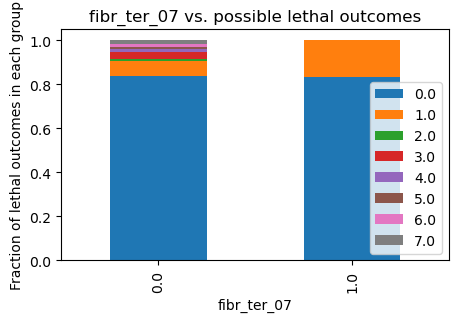

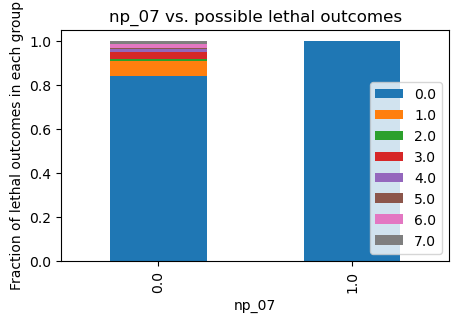

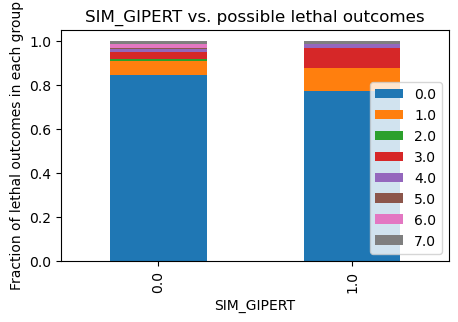

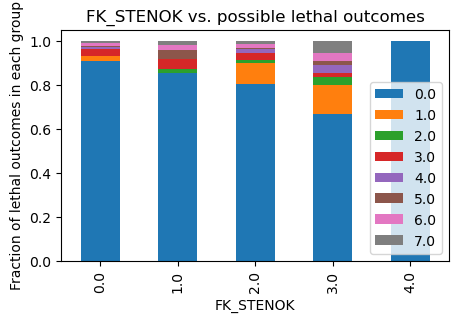

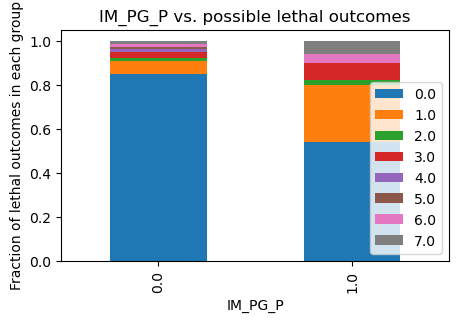

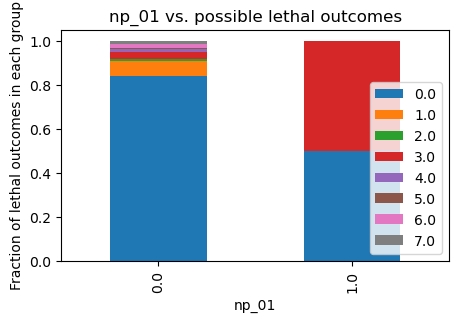

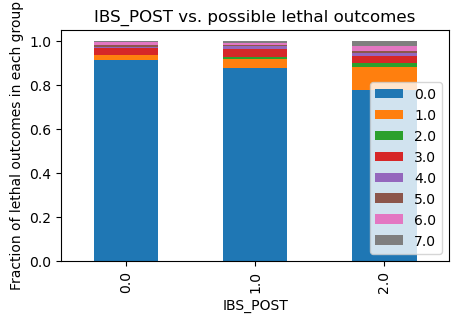

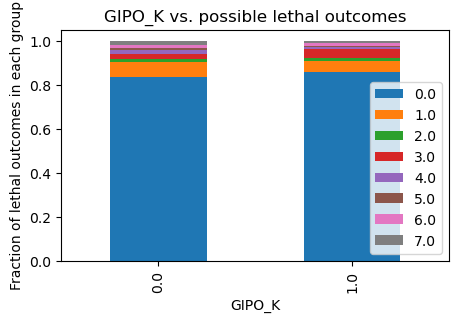

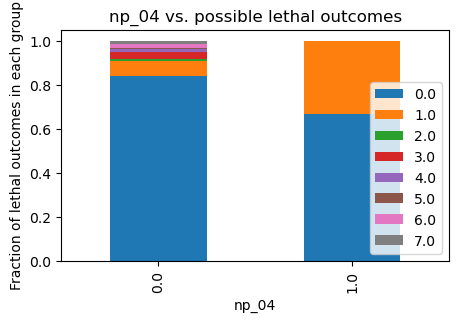

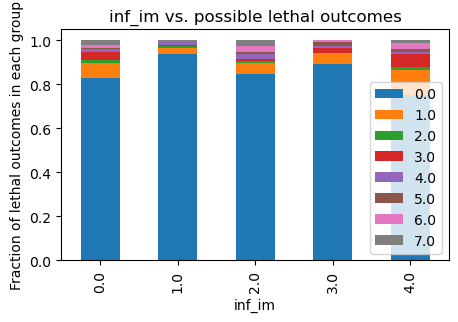

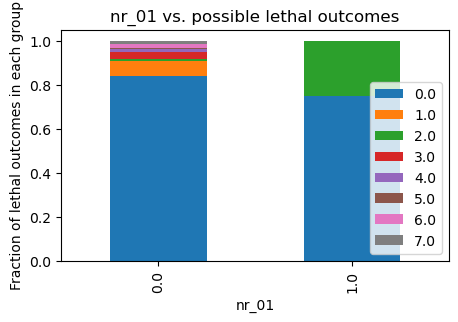

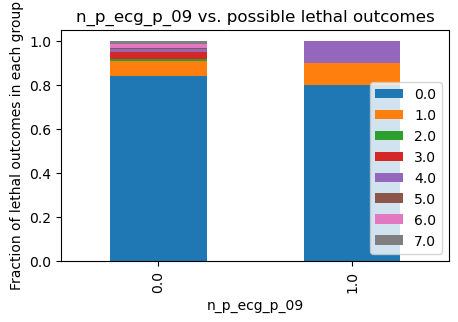

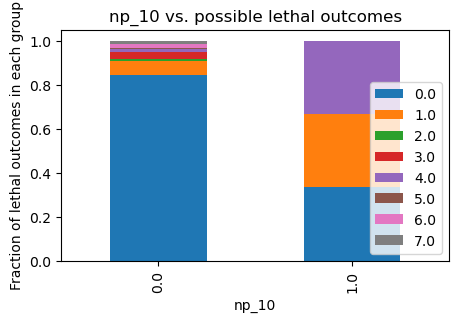

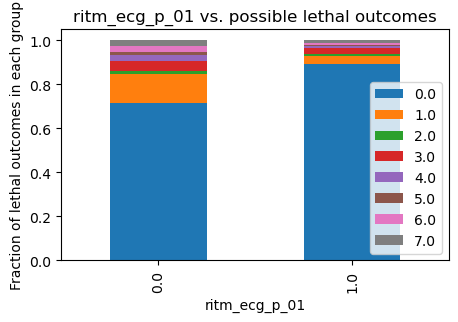

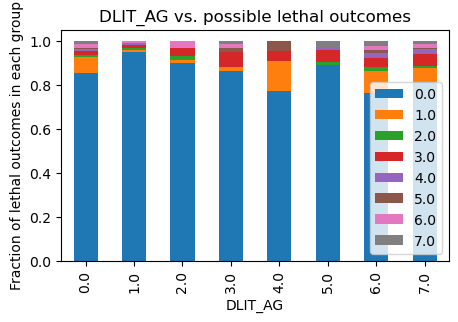

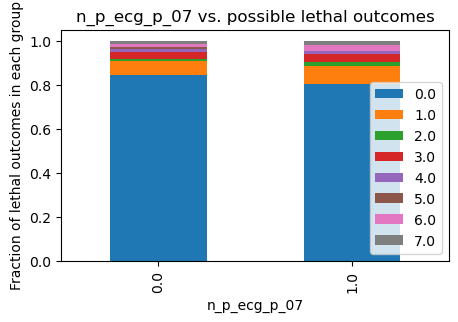

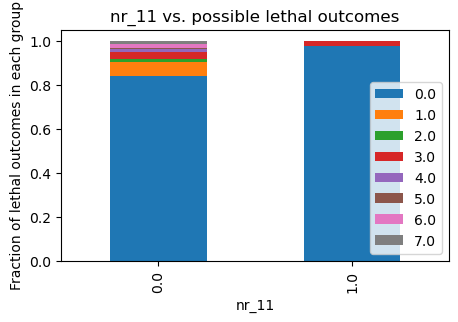

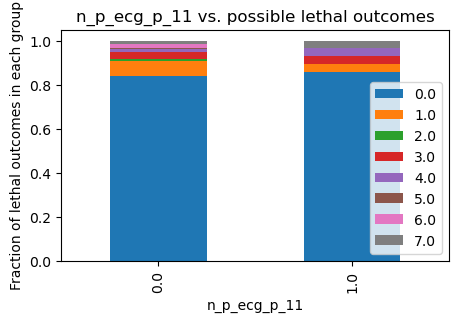

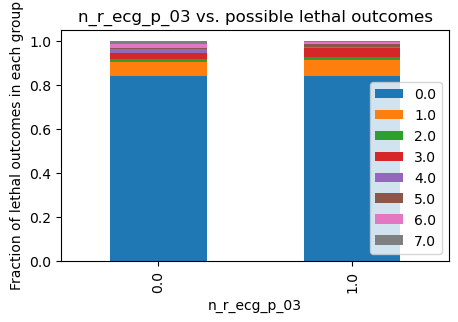

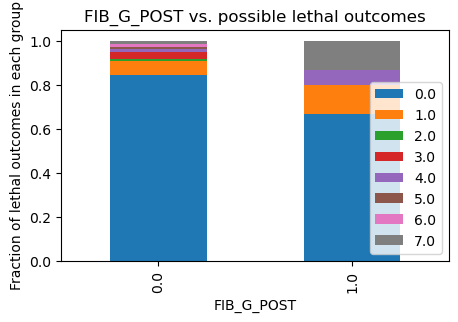

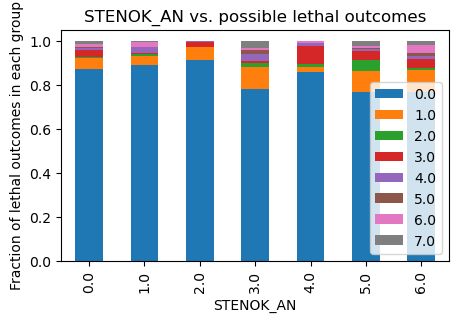

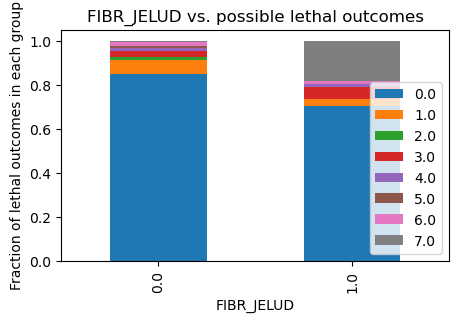

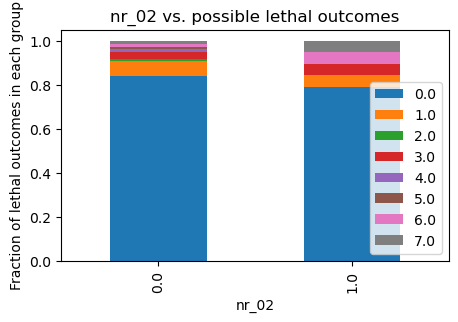

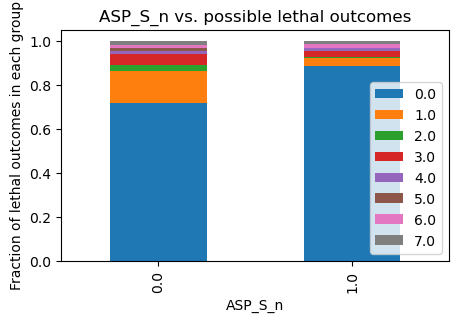

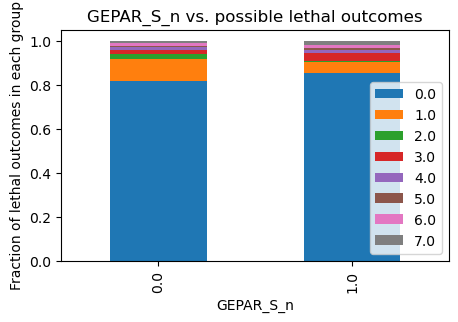

In [171]:
# continuous features: AGE, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, K_BLOOD, Na_BLOOD, ALT_BLOOD, AST_BLOOD, KFK_BLOOD, L_BLOOD, ROE
# cateogorical features: all others
from sklearn.experimental import enable_iterative_imputer  # Required to enable IterativeImputer
from sklearn.impute import IterativeImputer

# Fill in with new "unknown" categories represented by an unused integer for the categorical data
add_2_as_unknown = ['IM_PG_P', 'SIM_GIPERT', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'O_L_POST', 'GT_POST', 'FIB_G_POST', 'SVT_POST', 'MP_TP_POST', 'K_SH_POST', 'ANT_CA_S_n', 'TIKL_S_n', 'TRENT_S_n', 'GEPAR_S_n', 'ASP_S_n', 'GIPO_K', 'GIPER_NA', 'NA_KB', 'LID_KB', 'NOT_NA_KB', 'IBS_NASL', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'endocr_01', 'endocr_02', 'endocr_03', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08','zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06']
add_3_as_unknown = ['IBS_POST']
add_4_as_unknown = ['INF_ANAM', 'GB', 'R_AB_1_n']
add_5_as_unknown = ['NA_R_1_n', 'NOT_NA_1_n', 'ZSN_A', 'post_im', 'FK_STENOK', 'inf_im', 'lat_im', 'ant_im']
add_7_as_unknown = ['STENOK_AN']
add_8_as_unknown = ['DLIT_AG']
add_10_as_unknown = ['TIME_B_S']

df[add_2_as_unknown] = df[add_2_as_unknown].fillna(2)
df[add_3_as_unknown] = df[add_3_as_unknown].fillna(3)
df[add_4_as_unknown] = df[add_4_as_unknown].fillna(4)
df[add_5_as_unknown] = df[add_5_as_unknown].fillna(5)
df[add_7_as_unknown] = df[add_7_as_unknown].fillna(7)
df[add_8_as_unknown] = df[add_8_as_unknown].fillna(8)
df[add_10_as_unknown] = df[add_10_as_unknown].fillna(10)

# for visualization 
continuous_imputer = IterativeImputer(max_iter=10, random_state=0)

df_imputed = continuous_imputer.fit_transform(df)
# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

missing_percentage = df_imputed.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print("Missing values percentage per column:")
print(missing_percentage_sorted)

# HANDLED ALL MISSING VALUES

all_features = df.iloc[:, 1:112].columns.tolist()
    
continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']
# ordinal_features = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
categorical_features = list(set(all_features) - set(continuous_features))

# treat lethal outcomes as continuous 
# scatter plot: continuous vs lethal outcome
for continuous_ftr in continuous_features:
    df_imputed.plot.scatter(continuous_ftr, 'LET_IS', figsize=(5,3), alpha=0.25, s=10)
    plt.ylabel('Lethal outcomes')
    plt.xlabel(continuous_ftr)
    plt.show()

# heatmap: continuous vs lethal outcome
nbins=20
for continuous_ftr in continuous_features:
    heatmap, xedges, yedges = np.histogram2d(df_imputed[continuous_ftr], df_imputed['LET_IS'], bins=nbins)
    extend = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Create the heatmap
    plt.imshow(heatmap, cmap='plasma')

    # Add color bar to show the scale
    plt.colorbar()

    plt.ylabel('Lethal outcomes')
    plt.xlabel(continuous_ftr)
    plt.show()

# category-specific histograms: continuous vs lethal outcome
# how to handle missing values????
categories = df_imputed['LET_IS'].unique()

for continuous_ftr in continuous_features:
    plt.figure(figsize=(5,3))
    bin_range = (df_imputed[continuous_ftr].min(),df_imputed[continuous_ftr].max())
    for c in categories:
        plt.hist(df_imputed[df_imputed['LET_IS']==c][continuous_ftr], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
    plt.legend()
    plt.suptitle('') # that's what you're after
    plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
    plt.ylabel('Fraction of lethal outcomes')
    plt.xlabel(continuous_ftr)
    plt.show() 


# box plot: continuous vs lethal outcome
# how to handle missing values????
for continuous_ftr in continuous_features:
    df_imputed[[continuous_ftr, 'LET_IS']].boxplot(by='LET_IS', figsize=(5,3))
    plt.suptitle('') # that's what you're after
    plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
    plt.ylabel(continuous_ftr)
    plt.show() 

# violin plot: continuous vs lethal outcome
# how to handle missing values????
for continuous_ftr in continuous_features:
    dataset=[df_imputed[df_imputed['LET_IS']==0][continuous_ftr].values,
             df_imputed[df_imputed['LET_IS']==1][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==2][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==3][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==4][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==5][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==6][continuous_ftr].values,
            df_imputed[df_imputed['LET_IS']==7][continuous_ftr].values]
    plt.figure(figsize=(5,3))
    plt.violinplot(dataset = dataset)
    plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
    plt.ylabel(continuous_ftr)
    plt.show() 
    
# treat lethal outcomes as categorical
# stacked bar plot: categorical vs lethal outcome
for categorical_ftr in categorical_features:
    count_matrix = df_imputed_mode.groupby([categorical_ftr, 'LET_IS']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
    plt.legend(loc=4)
    plt.title(f'{categorical_ftr} vs. possible lethal outcomes')
    plt.ylabel('Fraction of lethal outcomes in each group')
    plt.show()

### Split the data
Splitting methods: 
1. iid data: basic split, K-fold Cross-Validation, stratified split, stratified K-fold
2. non-iid data: GroupKFold, GroupShuffleSplit, TimeSeriesSplit

**Q1** How would you split this data and why?

I am choosing to focus on the time point 24 hours after a patient is admitting to the hospital because this time point allows for assessment of the patient's response to initial treatment and interventions, prediction of early complications that may arise within the first day, and provide a snapshot of the patient's condition after stabilization efforts first begin. Thus, I can drop the non-applicable columns (as advised by the dataset authors themselves), which include columns 94, 95, 101, 102, 104, and 105. However, I do recognize that only focusing on this time point may mean that I cannot capture complications that develop later or may be influenced by further treatment interventions. \
Knowing this, I will choose to use stratified KFold splitting since the target variable I am dealing with is significantly imbalanced, this is a classification problem, and KFold enables a robust approach to evaluating how well my model will deal with different subsets of the dataset. 


**Q2** Split the dataset into training, validation, and test sets.

In [161]:
# Prep for splitting: separate the feature matrix X, and the target variable Y
from sklearn.model_selection import KFold, train_test_split
y = df["LET_IS"] 
X = df.loc[:, df.columns != 'LET_IS'] # all other columns are features

# SPLITTING
# Use KFold Cross-Valiation to split the data - unshuffled data can introduce errors while training the model
random_state = 0
test_size = 0.2
n_splits = 4
splits = []

# first split to obtain test set
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) # leaves train_size + val_size data behind

# second split 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
for train_index, val_index in kf.split(X_other, y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    
    splits.append((X_train, y_train, X_val, y_val, X_test, y_test))

for i, (X_train, y_train, X_val, y_val, X_test, y_test) in enumerate(splits):
    print(f'\033[1m-----------SPLIT {i+1}-----------\033[0m')
    print("\nTrain Set: ")
    print(X_train.head())
    print("\nValidation Set: ")
    print(X_val.head())
    print("\nTest Set: ")
    print(X_test.head())
    print("\nShapes of sets:")
    print("X_train:", X_train.shape)
    print("X_val:", X_val.shape)
    print("X_test:", X_test.shape)
    print("\n" + "="*80 +  "\n")

-----------SPLIT 1-----------

Train Set: 
        ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1540  1541  45.0    1       0.0        4.0        2.0       3.0       2.0   
1240  1241  60.0    1       1.0        4.0        2.0       2.0       2.0   
1235  1236  80.0    0       0.0        0.0        0.0       2.0       2.0   
985    986  92.0    1       0.0        6.0        2.0       1.0       2.0   
45      46  70.0    0       0.0        6.0        2.0       2.0       2.0   

       GB  SIM_GIPERT  ...  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  \
1540  2.0         0.0  ...          0          0           1         0   
1240  0.0         0.0  ...          0          0           0         0   
1235  2.0         0.0  ...          0          0           0         0   
985   2.0         0.0  ...          0          0           0         0   
45    3.0         0.0  ...          0          0           0         0   

      OTEK_LANC  RAZRIV  DRESSLER  ZSN  REC_IM  P

**Q3** Is your splitting method reproducible? How do you know? 

It is reproducible because my sets remain the same no matter how many times I rerun the cell. I've fixed the sets by setting the random_state to a constant. 

### Preprocess the data
Preprocessing methods: 
1. OneHotEncoder - converts unordered categorical features into dummy arrays
2. OrdinalEncoder - converts ordinal features into an integer array
3. MinMaxScaler - scales continuous variables to be between 0 and 1
4. StandardScaler - standardies continuous features by removing the mean and scaling to unit variance

**Q1** What preprocessors will you use and why?

- categorical features -> onehotencoder: Creates binary columns for each category. Useful for nominal data where categories don’t have an intrinsic order. Helps avoid misleading interpretations from label encoding.
- ordinal features -> ordinalencoder: Order is preserved in a way that is meaningful for analysis or predictive modeling
- continuous features -> minmaxscaler or standardscaler (default to standard scaler because you don't have to know what the range is), the continuous features (e.g., age, blood test results) have different ranges or units so scaling helps normalize them such that the model treats all features equally

**Q2** Preprocess your data.

In [162]:
# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# X and Y are already numbers! 

# collect which encoder to use on each feature, needs to be done manually
all_features = df.iloc[:, 1:112].columns.tolist()

continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']
ordinal_features = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']
categorical_features = list(set(all_features) - set(continuous_features) - set(ordinal_features))

onehot_ftrs = categorical_features
ordinal_ftrs = ordinal_features

# Create the imputer
iterative_imputer = IterativeImputer()

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('iterativeimputer', iterative_imputer, continuous_features), # impute missing values for continuous features
        ('standardscaler', StandardScaler(), continuous_features),  # Scale continuous features
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs),
        ('ordinal', OrdinalEncoder(), ordinal_ftrs))

clf = Pipeline(steps=[('preprocessor', preprocessor)])

split_post_preprocess = []

for i, (X_train, y_train, X_val, y_val, X_test, y_test) in enumerate(splits):
    X_train_prep = clf.fit_transform(X_train) # Imputation will occur here
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    split_post_preprocess.append((X_train_prep, y_train, X_val_prep, y_val, X_test_prep, y_test))
    print(f'\033[1m-----------SPLIT {i+1}-----------\033[0m')
    print("\nPreprocessed Train Set: ")
    print(X_train_prep[:5])
    print("\nPreprocessed Validation Set: ")
    print(X_val_prep[:5])
    print("\nPreprocessed Test Set: ")
    print(X_test_prep[:5])
    print("\nShapes of sets before and after preprocessing:")
    print("X_train (before):", X_train.shape)
    print("X_train (after):", X_train_prep.shape)
    print("X_val (before):", X_val.shape)
    print("X_val (after):", X_val_prep.shape)
    print("X_test (before):", X_test.shape)
    print("X_test (after):", X_test_prep.shape)
    print("\n" + "="*80 +  "\n")

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 23 (1824011170.py, line 27)

**Q3** How many features and data points do you have before and after preprocessing?

See above.